# 引用view.py的代码示例

本示例展示如何在testview.ipynb中引用view.py中的函数和类。

In [1]:
from pathlib import Path
import sys

import ipywidgets as widgets
from IPython.display import display

PACKAGE_ROOT = Path('..').resolve()
PROJECT_ROOT = PACKAGE_ROOT.parent
for path in (PROJECT_ROOT, PACKAGE_ROOT):
    if str(path) not in sys.path:
        sys.path.append(str(path))

from stealth_monitor import config as monitor_config
from stealth_monitor.notebook_utils import TimeframePlan, load_market_data
from stealth_monitor.view import (
    prepare_backtest,
    DOTTED_DASH_PATTERN,
    DOTTED_MARKER_STEP,
    build_backtest_from_dataframe,
    display_bokeh,
    render_dotted_ma,
    render_ma_line,
    render_native_silver_ma,
    render_native_silver_ma2,
    render_silver_candles,
)


c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
# 配置所有可观察的品种，并提供交互选择控件
instrument_dropdown = widgets.Dropdown(
    options=[(item.label, item.key) for item in monitor_config.INSTRUMENTS],
    value=monitor_config.INSTRUMENTS[0].key,
    description='品种:',
    layout=widgets.Layout(width='260px'),
)

TIMEFRAME_CONFIG = {
    '1d': TimeframePlan(base_key='1d'),
    '1m': TimeframePlan(base_key='1m'),
    '5m': TimeframePlan(base_key='5m'),
    '15m': TimeframePlan(base_key='15m'),
    '30m': TimeframePlan(base_key='30m'),
    '1h': TimeframePlan(base_key='60m'),
    '4h': TimeframePlan(base_key='60m', resample_rule='4H', limit_multiplier=4),
    '1d_alt': TimeframePlan(base_key='1d'),
}

timeframe_selector = widgets.ToggleButtons(
    options=[
        ('日线', '1d'),
        ('1分钟', '1m'),
        ('5分钟', '5m'),
        ('15分钟', '15m'),
        ('30分钟', '30m'),
        ('1小时', '1h'),
        ('4小时', '4h'),
        ('1天', '1d_alt'),
    ],
    value='1d',
    description='周期:',
    button_style='',
    layout=widgets.Layout(width='100%'),
)

limit_slider = widgets.IntSlider(
    value=200,
    min=50,
    max=800,
    step=50,
    description='条数:',
    continuous_update=False,
)

control_panel = widgets.VBox([
    instrument_dropdown,
    timeframe_selector,
    limit_slider,
])



In [3]:
# 使用当前选择拉取行情数据（优先启用缓存策略）

def get_data():
    selected_plan = TIMEFRAME_CONFIG[timeframe_selector.value]
    data_limit = int(limit_slider.value)

    market_df = load_market_data(
        instrument_dropdown.value,
        selected_plan,
        limit=data_limit,
        prefer_cache=True,
    )
    return market_df

# market_df.tail()


In [4]:
display(control_panel)

In [5]:
# ???????? Backtest
def build_backtest():
    df = get_data()
    return build_backtest_from_dataframe(df)

bt = build_backtest()

Backtest.run:   0%|          | 0/199 [00:00<?, ?bar/s]

In [ ]:
%%capture
native_silver_ma2 =  render_native_silver_ma2(bt)


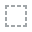
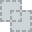
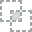
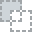
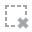
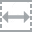
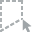
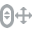
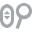
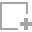
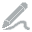
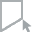
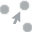
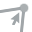
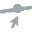

In [14]:
# Backtest ?????? + ????
display_bokeh(native_silver_ma2)


### 原生银色 MA 示例
使用 GOOG 示例数据运行 `PassiveStrategy`，再调用 `render_native_silver_ma2` 进行展示。


Backtest.run:   0%|          | 0/179 [00:00<?, ?bar/s]

c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(



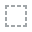
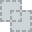
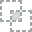
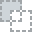
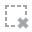
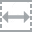
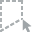
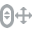
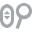
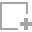
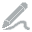
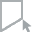
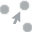
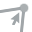
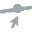

In [7]:
# 原生银色 MA 渲染示例
bt_native_demo = prepare_backtest(sample_size=180)
display_bokeh(render_native_silver_ma2(bt_native_demo))


c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(



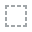
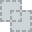
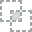
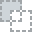
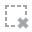
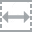
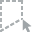
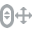
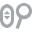
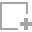
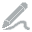
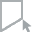
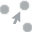
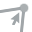
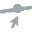

In [8]:
# ???????
display_bokeh(render_silver_candles(bt))


c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(



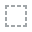
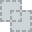
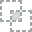
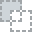
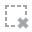
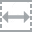
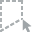
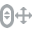
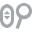
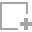
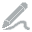
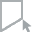
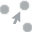
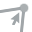
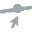

In [9]:
# ???? MA ?? (????)
display_bokeh(render_ma_line(bt))


c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\Users\nillouise\anaconda3\Lib\site-packages\backtesting\_plotting.py:709: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(



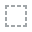
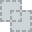
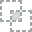
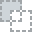
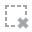
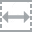
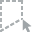
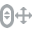
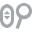
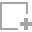
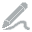
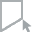
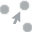
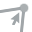
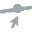

In [10]:
# 渲染银色点状 MA 图
display_bokeh(render_dotted_ma(bt, DOTTED_DASH_PATTERN, DOTTED_MARKER_STEP))
